In [1]:
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox

In [2]:
point = (52.469501, 13.341690)
dist = 600

In [3]:
streets = gpd.read_file(momepy.datasets.get_path('bubenec'), layer='streets')

In [4]:
streets_graph = ox.graph_from_point(point, distance=dist, network_type='walk')
streets_graph = ox.project_graph(streets_graph)
edges = ox.save_load.graph_to_gdfs(streets_graph, nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

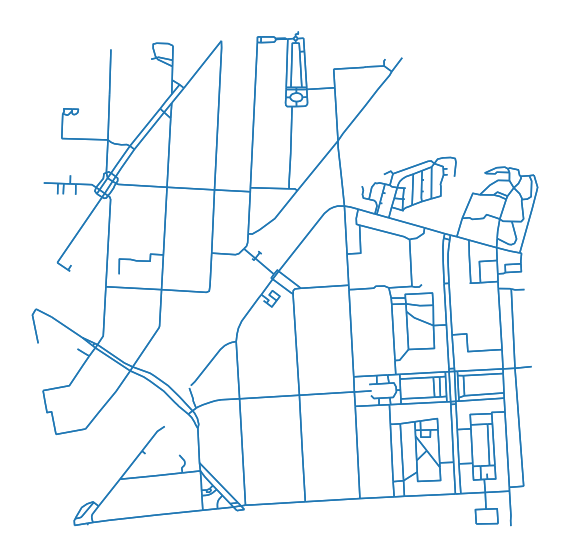

In [5]:
f, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [6]:
graph = momepy.gdf_to_nx(edges, approach='primal')

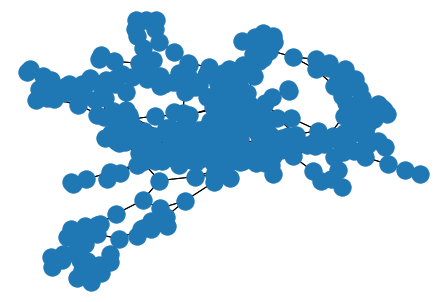

In [7]:
nx.draw(graph)

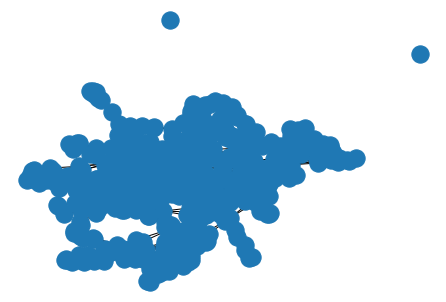

In [8]:
dual = momepy.gdf_to_nx(edges, approach='dual')
nx.draw(dual)

In [9]:
degree = dict(nx.degree(graph))
nx.set_node_attributes(graph, degree, 'degree')

In [10]:
graph = momepy.node_degree(graph, name='degree')

In [11]:
nodes, edges, sw = momepy.nx_to_gdf(graph, points=True, lines=True,
                                    spatial_weights=True)

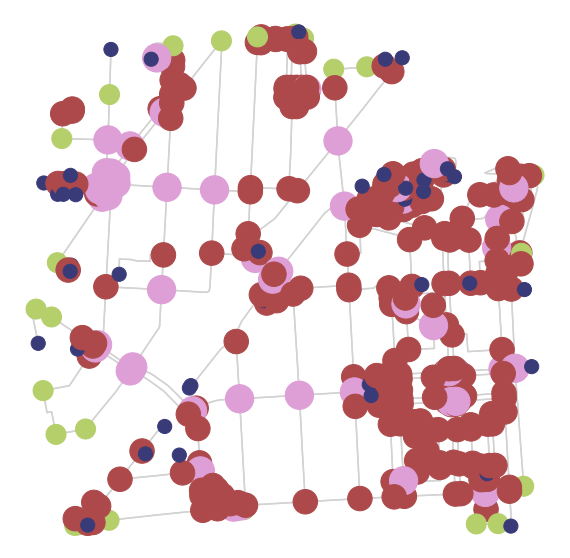

In [12]:
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(ax=ax, column='degree', cmap='tab20b', markersize=(nodes['degree'] * 100), zorder=2)
edges.plot(ax=ax, color='lightgrey', zorder=1)
ax.set_axis_off()
plt.show()

In [13]:
streets_graph = ox.graph_from_point((52.469501, 13.341690), distance=300, network_type='all')
streets_graph = ox.project_graph(streets_graph)

streets = ox.save_load.graph_to_gdfs(streets_graph, nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

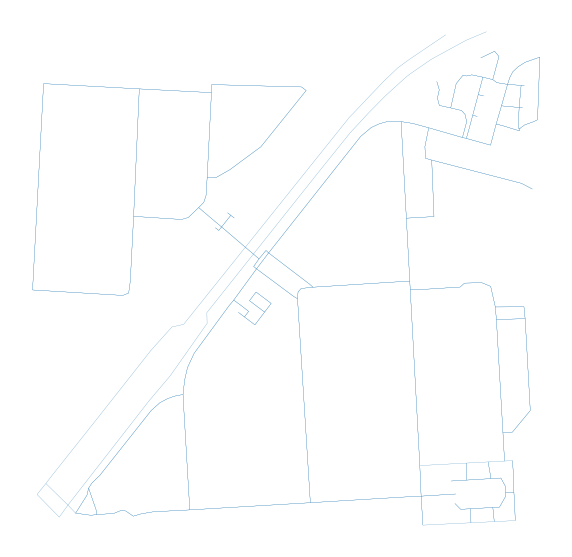

In [14]:
f, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()
plt.show()

In [15]:
graph = momepy.gdf_to_nx(streets)

In [16]:
graph = momepy.clustering(graph, name='clustering')

In [17]:
graph = momepy.meshedness(graph, radius=5, name='meshedness')

100%|██████████| 100/100 [00:00<00:00, 537.22it/s]


In [18]:
graph = momepy.meshedness(graph, radius=400, name='meshedness400',
                          distance='mm_len')

100%|██████████| 100/100 [00:00<00:00, 430.71it/s]


In [19]:
nodes = momepy.nx_to_gdf(graph, points=True, lines=False, spatial_weights=False)

C:\Users\Alex\anaconda3\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
C:\Users\Alex\anaconda3\lib\site-packages\mapclassify\classifiers.py:239: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


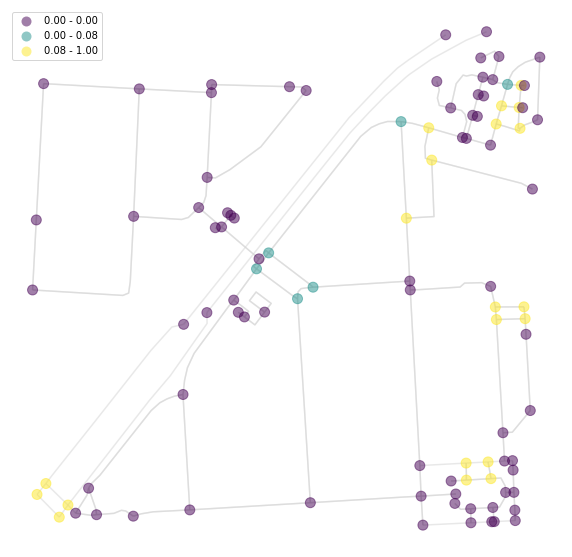

In [20]:
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(ax=ax, column='clustering', markersize=100, legend=True, cmap='viridis',
           scheme='quantiles', alpha=0.5, zorder=2)
streets.plot(ax=ax, color='lightgrey', alpha=0.5, zorder=1)
ax.set_axis_off()
plt.show()

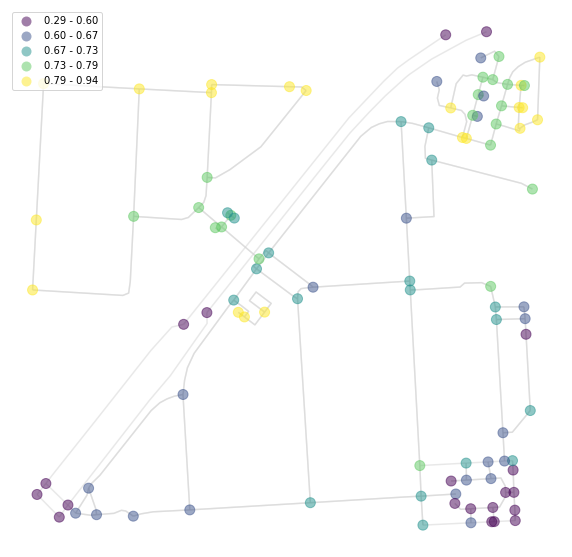

In [21]:
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(ax=ax, column='meshedness', markersize=100, legend=True, cmap='viridis',
           alpha=0.5, zorder=2, scheme='quantiles')
streets.plot(ax=ax, color='lightgrey', alpha=0.5, zorder=1)
ax.set_axis_off()
plt.show()

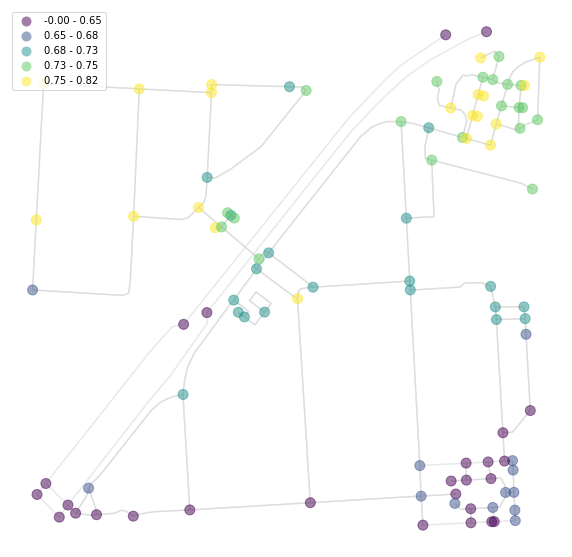

In [22]:
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(ax=ax, column='meshedness400', markersize=100, legend=True, cmap='viridis',
           alpha=0.5, zorder=2, scheme='quantiles')
streets.plot(ax=ax, color='lightgrey', alpha=0.5, zorder=1)
ax.set_axis_off()
plt.show()

In [23]:
streets_graph = ox.graph_from_point((52.469501, 13.341690), distance=1000, network_type='all')
streets_graph = ox.project_graph(streets_graph)

In [24]:
edges = ox.save_load.graph_to_gdfs(streets_graph, nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

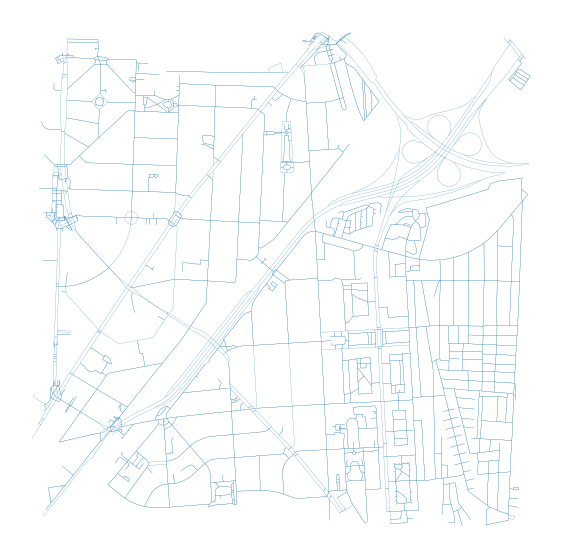

In [25]:
f, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()
plt.show()

In [26]:
primal = momepy.gdf_to_nx(edges, approach='primal')

In [27]:
primal = momepy.local_closeness_centrality(primal, radius=800, name='closeness400', distance='mm_len', weight='mm_len')

100%|██████████| 1389/1389 [00:41<00:00, 33.19it/s]


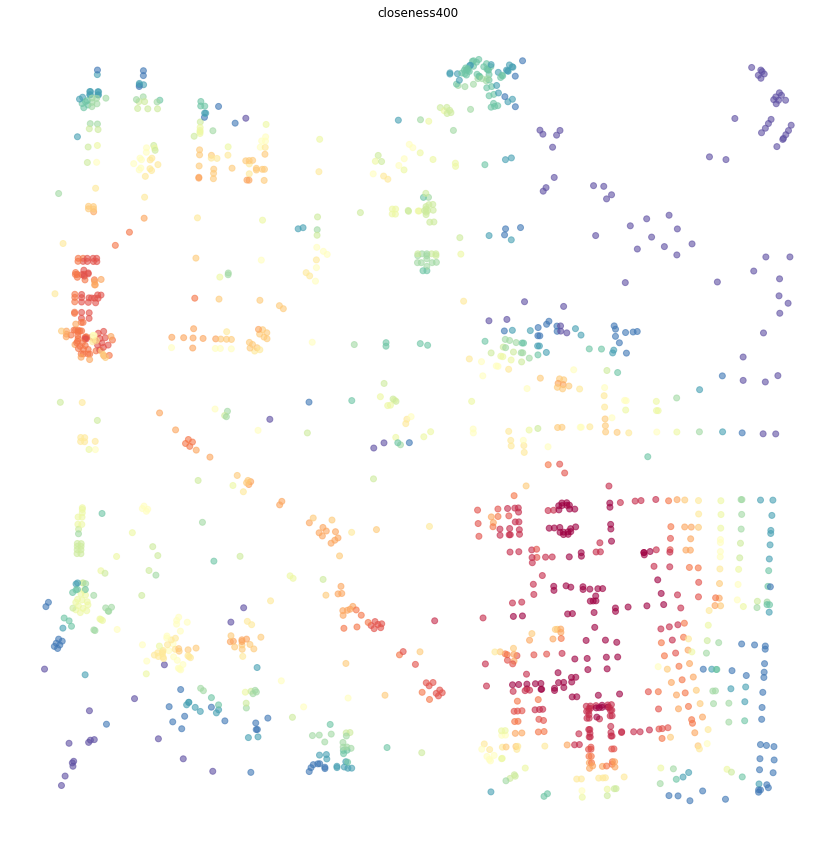

In [28]:
nodes = momepy.nx_to_gdf(primal, lines=False)
f, ax = plt.subplots(figsize=(15, 15))
nodes.plot(ax=ax, column='closeness400', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('closeness400')
plt.show()

In [29]:
primal = momepy.closeness_centrality(primal, name='closeness_global', weight='mm_len')

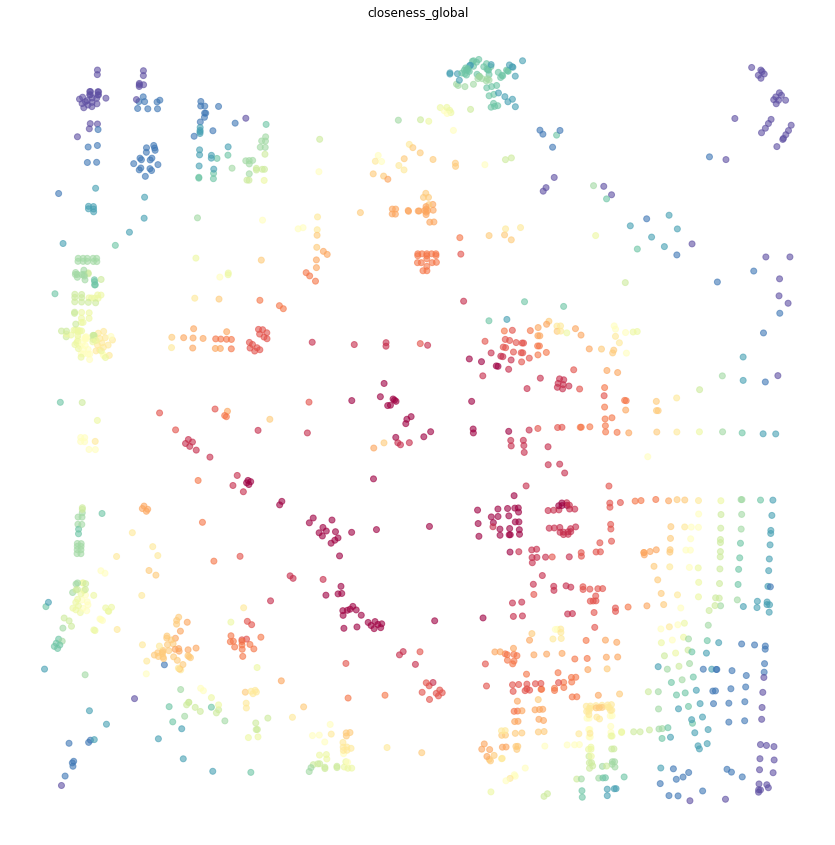

In [30]:
nodes = momepy.nx_to_gdf(primal, lines=False)
f, ax = plt.subplots(figsize=(15, 15))
nodes.plot(ax=ax, column='closeness_global', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('closeness_global')
plt.show()

In [31]:
primal = momepy.betweenness_centrality(primal, name='betweenness_metric_n', mode='nodes', weight='mm_len')

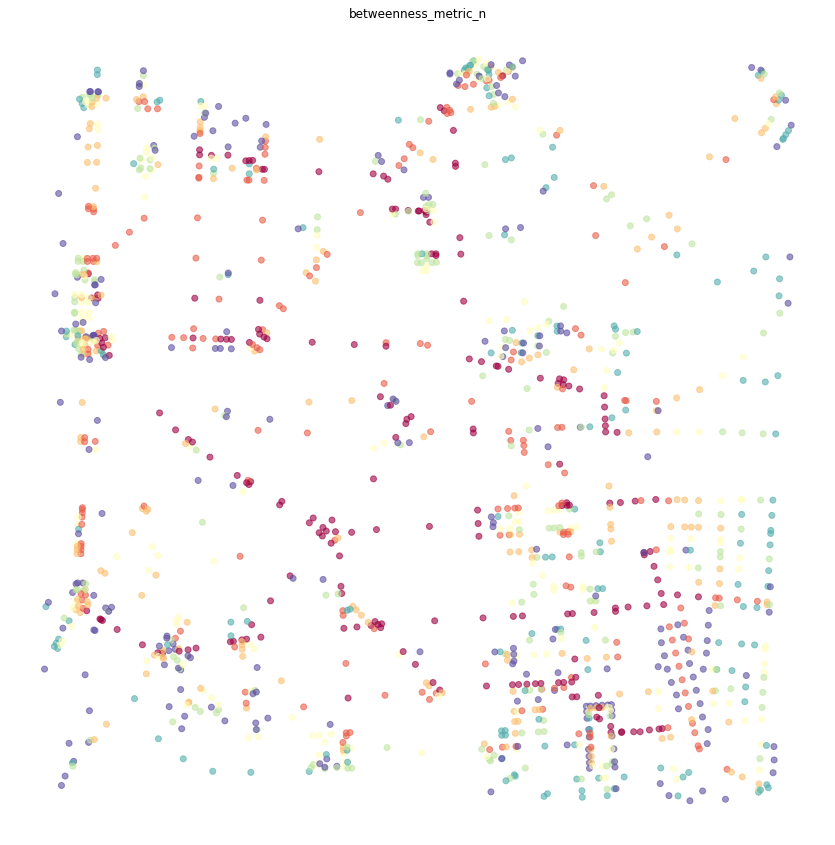

In [32]:
nodes = momepy.nx_to_gdf(primal, lines=False)
f, ax = plt.subplots(figsize=(15, 15))
nodes.plot(ax=ax, column='betweenness_metric_n', cmap='Spectral_r', scheme='quantiles', k=7, alpha=0.6)
ax.set_axis_off()
ax.set_title('betweenness_metric_n')
plt.show()

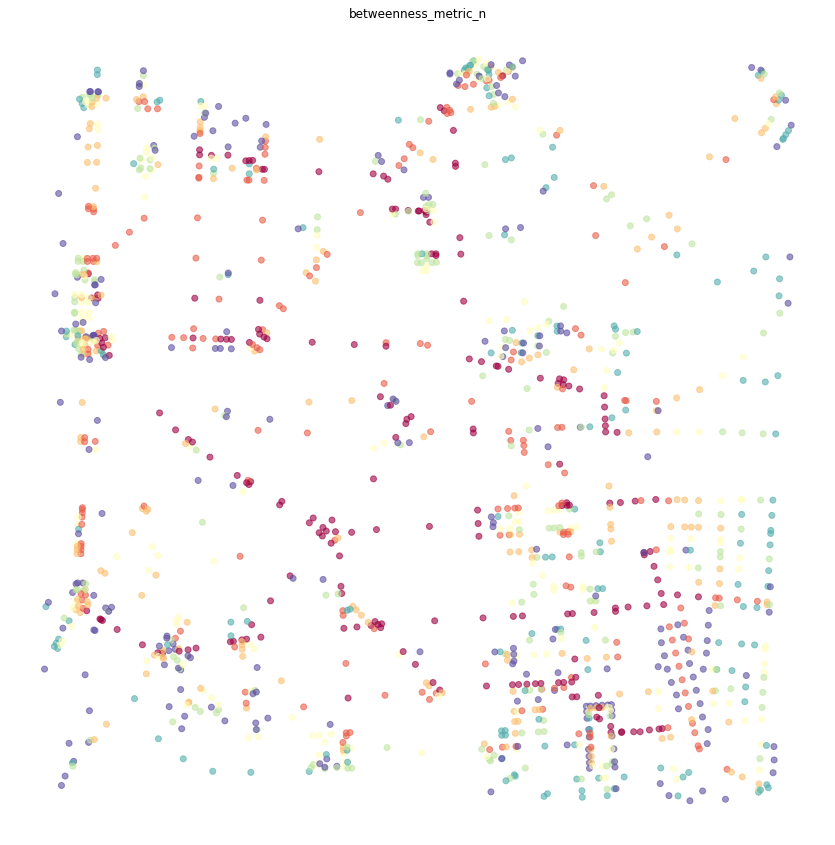

In [33]:
nodes = momepy.nx_to_gdf(primal, lines=False)
f, ax = plt.subplots(figsize=(15, 15))
nodes.plot(ax=ax, column='betweenness_metric_n', cmap='Spectral_r', scheme='quantiles', k=7, alpha=0.6)
ax.set_axis_off()
ax.set_title('betweenness_metric_n')
plt.show()

In [34]:
primal = momepy.betweenness_centrality(primal, name='betweenness_metric_e', mode='edges', weight='mm_len')

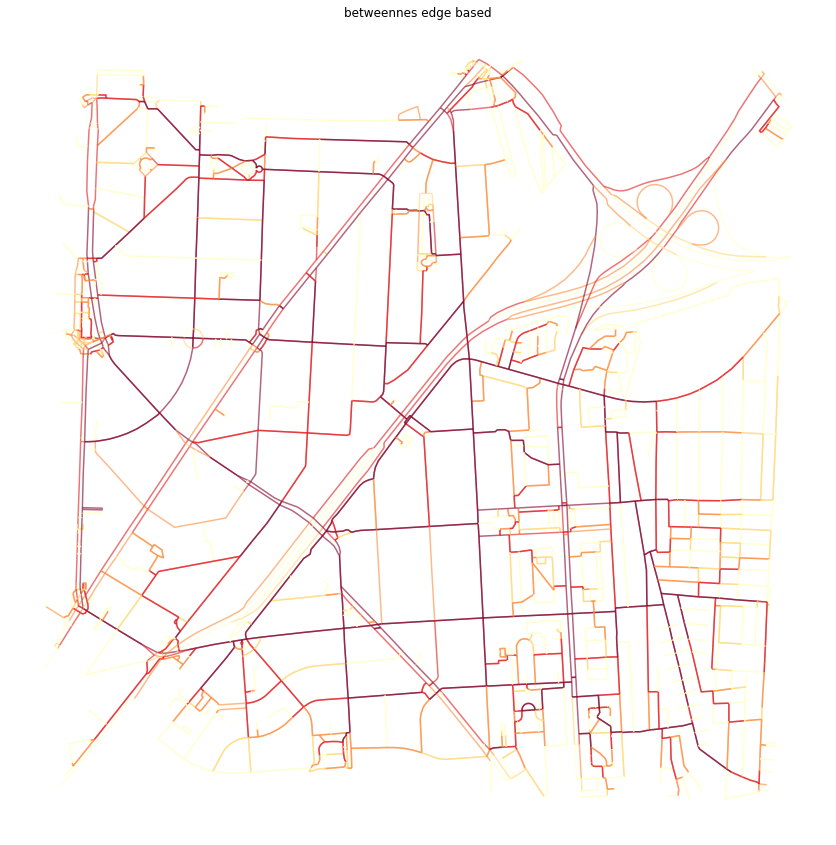

In [35]:
primal_gdf = momepy.nx_to_gdf(primal, points=False)
f, ax = plt.subplots(figsize=(15, 15))
primal_gdf.plot(ax=ax, column='betweenness_metric_e', cmap='YlOrRd', scheme='quantiles', alpha=0.6)
ax.set_axis_off()
ax.set_title('betweennes edge based')
plt.show()

In [36]:
primal = momepy.straightness_centrality(primal)

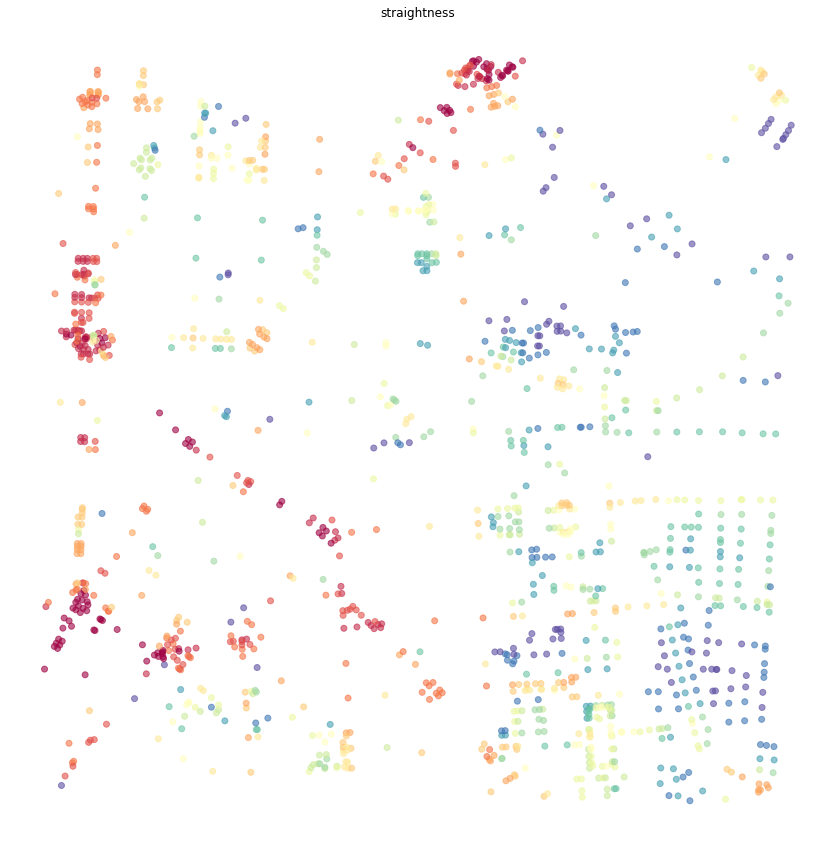

In [37]:
nodes = momepy.nx_to_gdf(primal, lines=False)
f, ax = plt.subplots(figsize=(15, 15))
nodes.plot(ax=ax, column='straightness', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('straightness')
plt.show()

In [38]:
momepy.mean_nodes(primal, 'straightness')
momepy.mean_nodes(primal, 'closeness400')
momepy.mean_nodes(primal, 'closeness_global')
momepy.mean_nodes(primal, 'betweenness_metric_n')

100%|██████████| 3504/3504 [00:00<00:00, 166748.07it/s]


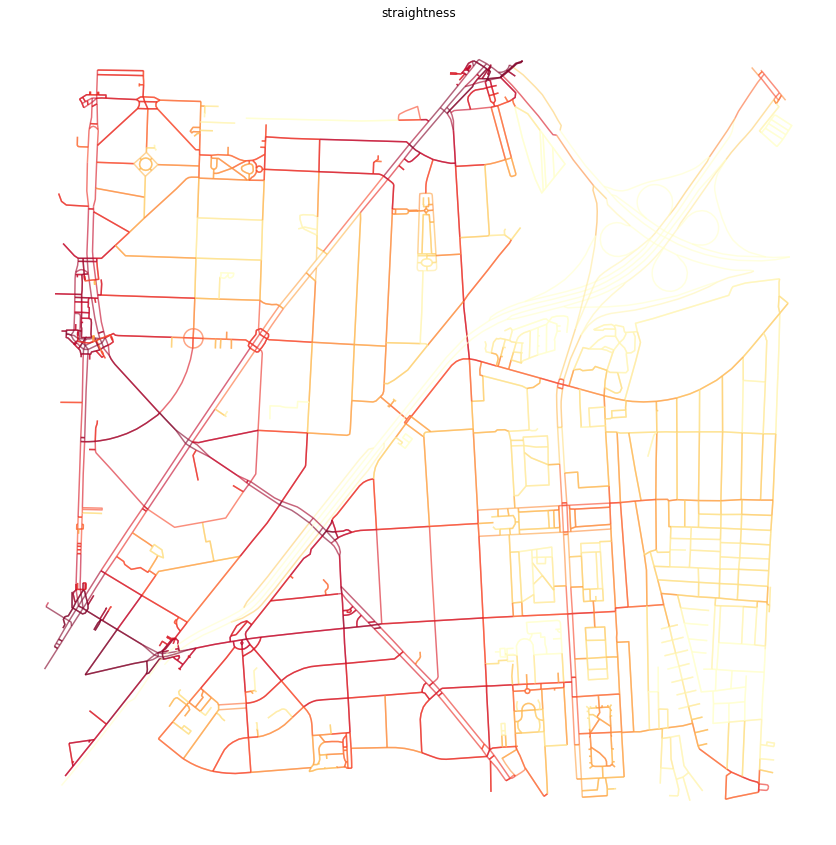

In [47]:
primal_gdf = momepy.nx_to_gdf(primal, points=False)

f, ax = plt.subplots(figsize=(15, 15))
primal_gdf.plot(ax=ax, column='straightness', cmap='YlOrRd', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('straightness')
plt.show()

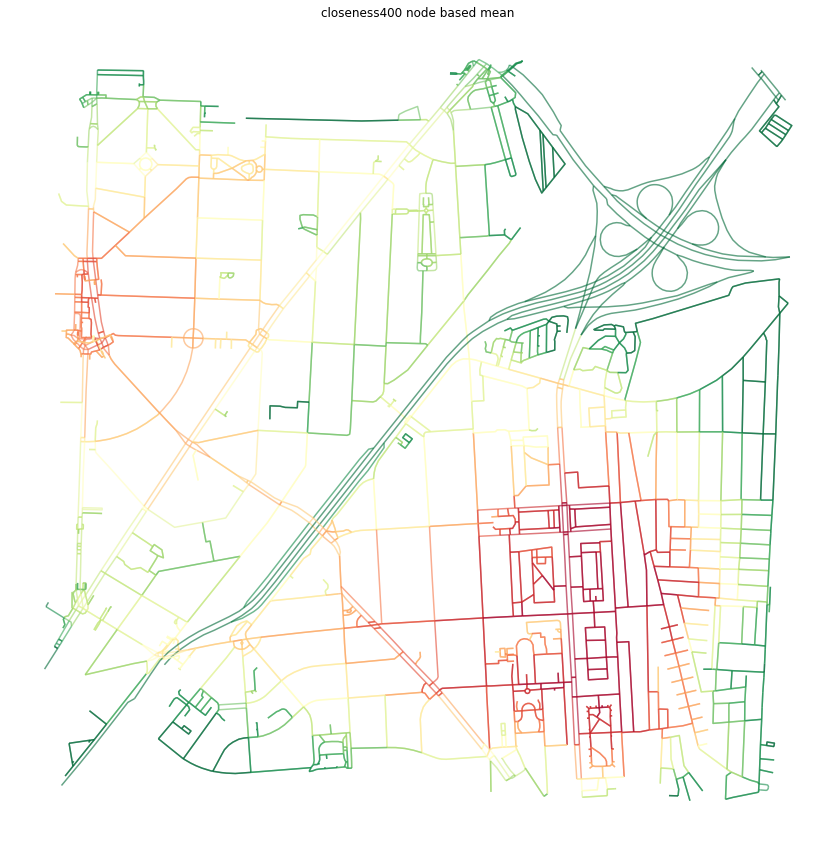

In [40]:
f, ax = plt.subplots(figsize=(15, 15))
primal_gdf.plot(ax=ax, column='closeness400', cmap='RdYlGn_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('closeness400 node based mean')
plt.show()

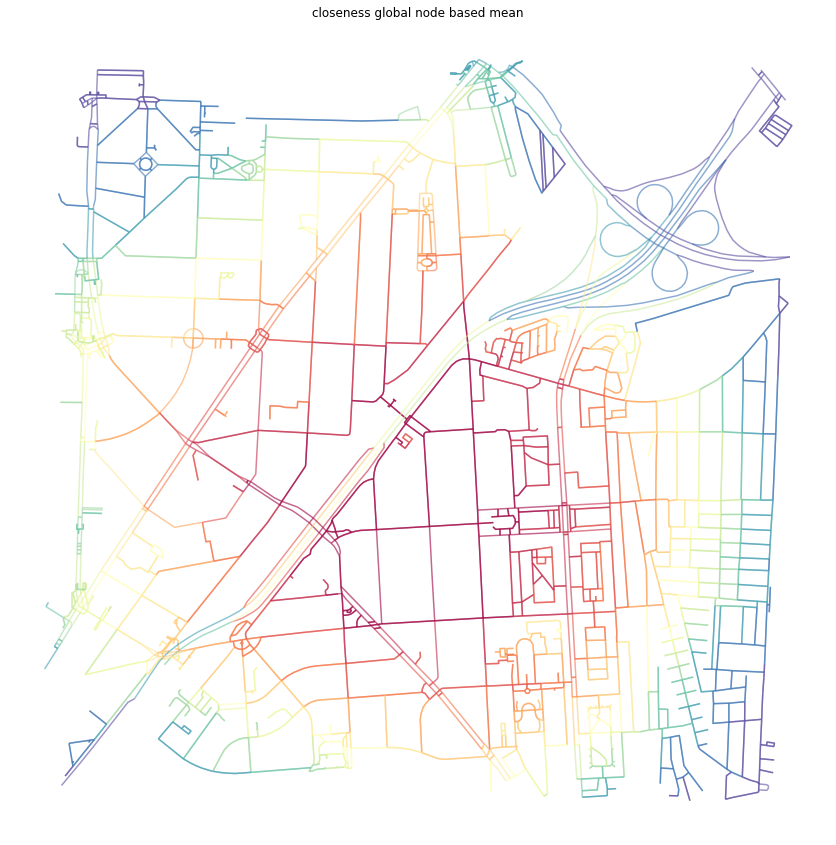

In [41]:
f, ax = plt.subplots(figsize=(15, 15))
primal_gdf.plot(ax=ax, column='closeness_global', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('closeness global node based mean')
plt.show()

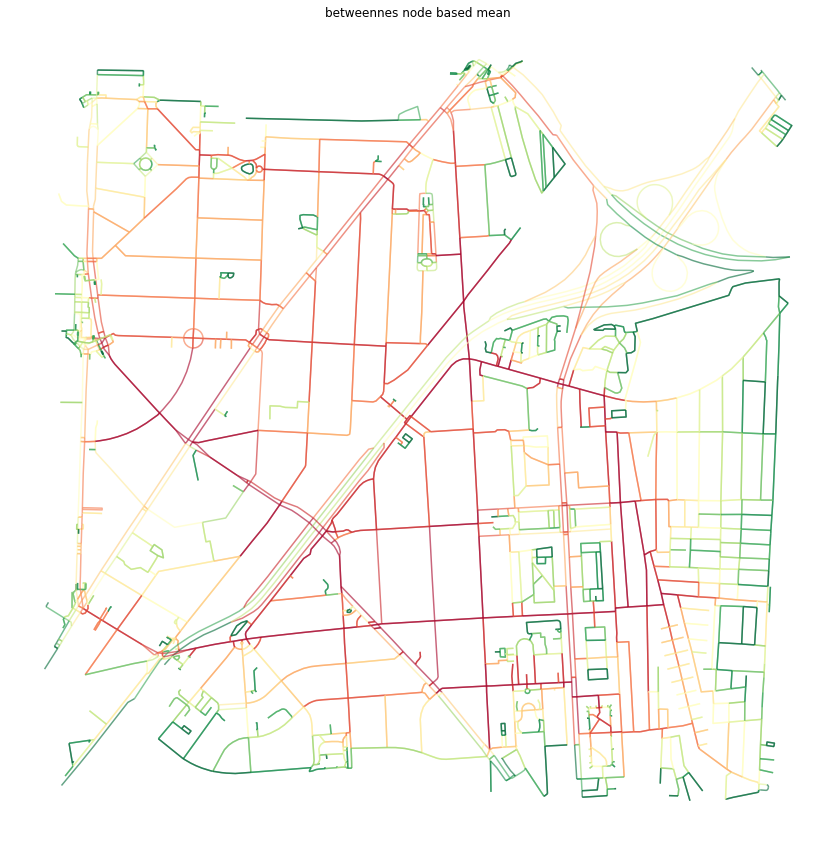

In [42]:
f, ax = plt.subplots(figsize=(15, 15))
primal_gdf.plot(ax=ax, column='betweenness_metric_n', cmap='RdYlGn_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('betweennes node based mean')
plt.show()

In [43]:
nodes, edges_p = momepy.nx_to_gdf(primal)

In [44]:
# topologically defined subgraph (5 steps) and topologically measured shortest path
momepy.local_betweenness_centrality(graph, radius=5, distance=None, weight=None)

# topologically defined subgraph (5 steps) and metrically measured shortest path
momepy.local_betweenness_centrality(graph, radius=5, distance=None, weight='edge_length')

# metrically defined subgraph (800 meters) and topologically measured shortest path
#momepy.local_betweenness_centrality(graph, radius=800, distance='edge_length', weight=None)

# metrically defined subgraph (800 meters) and metrically measured shortest path
#momepy.local_betweenness_centrality(graph, radius=800, distance='edge_length', weight='edge_length')

100%|██████████| 100/100 [00:00<00:00, 212.60it/s]


KeyError: 'edge_length'

In [ ]:
dual = momepy.local_closeness_centrality(dual, radius=5, name='angcloseness400', weight='angle')


In [ ]:
dual_gdf = momepy.nx_to_gdf(dual, points=False)

f, ax = plt.subplots(figsize=(15, 15))
dual_gdf.plot(ax=ax, column='angcloseness400', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('closeness angular 400')
plt.show()

In [ ]:
dual = momepy.closeness_centrality(dual, name='closeness_global_ang', weight='angle')

In [ ]:
dual_gdf = momepy.nx_to_gdf(dual, points=False)
f, ax = plt.subplots(figsize=(15, 15))
dual_gdf.plot(ax=ax, column='closeness_global_ang', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('closeness angular global')
plt.show()

In [ ]:
dual = momepy.betweenness_centrality(dual, name='angbetweenness', mode='nodes', weight='angle')

In [ ]:
dual_gdf = momepy.nx_to_gdf(dual, points=False)
f, ax = plt.subplots(figsize=(15, 15))
dual_gdf.plot(ax=ax, column='angbetweenness', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('betweenness angular')
plt.show()